In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [5]:
batch_size = 64
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size = 3,stride=1, padding=1)
        # kernel_size = 5 means 5x5 filter
        # kernel_size is the size of the filter window
        self.conv2 = nn.Conv2d(16, 32, kernel_size = 3,stride=1, padding=1)
        self.fc1 = nn.Linear(32*7*7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv1(x), 2))
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv2(x), 2))
        x = x.view(x.size(0),-1)
        # view() is a reshape function
        # -1 means the size of that dimension is inferred
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim = 1)
        # log_softmax is a log of softmax function

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train = True, download = True,
                    transform = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.5), (0.5))
                    ])),
    batch_size = batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train = False, download = True,
                    transform = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.5), (0.5))
                    ])),
    batch_size = batch_size, shuffle = True)

In [24]:
model = Net()

In [25]:
train_loader.dataset.train_data

/home/kalilovm/projects/ML/venv/lib/python3.11/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [27]:
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f"Epoch {epoch + 1} - Training loss: {running_loss / len(train_loader)}")


Epoch 1 - Training loss: 0.19823521202199781
Epoch 2 - Training loss: 0.05685417905304906
Epoch 3 - Training loss: 0.03896654491591553
Epoch 4 - Training loss: 0.03113077980768271
Epoch 5 - Training loss: 0.025261576023791903
Epoch 6 - Training loss: 0.020136459946315532
Epoch 7 - Training loss: 0.01520303558696112
Epoch 8 - Training loss: 0.012412520682107431
Epoch 9 - Training loss: 0.010962516023520564
Epoch 10 - Training loss: 0.010835805355487452


In [28]:
# testing
correct = 0
total = 0
with torch.inference_mode():
		for images, labels in test_loader:
				outputs = model(images)
				_, predicted = torch.max(outputs.data, 1)
				total += labels.size(0)
				correct += (predicted == labels).sum()

print(f"Accuracy of the network on the 10000 test images: {100 * correct / total}%")

Accuracy of the network on the 10000 test images: 99.12999725341797%


In [29]:
# save model
torch.save(model.state_dict(), "mnist_cnn.pt")

In [10]:
# print sample shape
print(train_loader.dataset.data.shape)
print(train_loader.dataset.targets.shape)
# which dimension should be image to predict?
# 0: batch, 1: channel, 2: height, 3: width
# example:
# 0: 64, 1: 1, 2: 28, 3: 28


torch.Size([60000, 28, 28])
torch.Size([60000])


In [14]:
images, labels = next(iter(test_loader))
print(images[0].shape)

torch.Size([1, 28, 28])


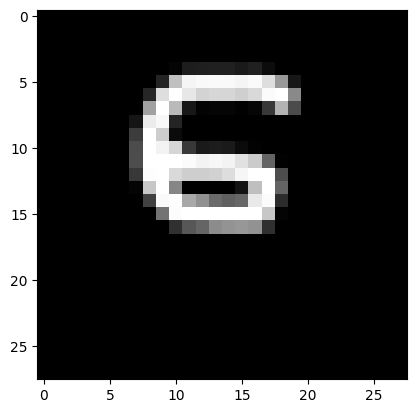

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 9


In [5]:
import torch
from PIL import Image
import numpy as np
from mnist_cnn_model import Net
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt

def show_image(image):
    image = image.reshape(28, 28)
    plt.imshow(image, cmap="gray")
    plt.show()


model = Net()
model.load_state_dict(torch.load("mnist_cnn.pt"))

def preprocess_image(image):
    image = image.convert('L')
    image = image.resize((28, 28))
    image = np.array(image)
    image = image.reshape(1, 28, 28)
    image = torch.from_numpy(image).float()
    return image



def predict(image):
    # image = preprocess_image(image)
    model.eval()
    with torch.no_grad():
        outputs = model(image)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
    return probabilities[0].tolist(), predicted.item()

with torch.inference_mode():
    model.eval()
    # image is test.png from .
    image = Image.open("test.png")
    test_image = preprocess_image(image)
    show_image(test_image)
    probabilities, predicted = predict(test_image)
    print(probabilities, predicted)